In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import joblib

# Exploratory Data Analysis

In [59]:
data = pd.read_csv("Sleep.csv")

In [60]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6.0,42.0,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6.0,60.0,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6.0,60.0,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4.0,30.0,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4.0,30.0,8,Obese,140/90,85,3000,Sleep Apnea


In [61]:
data.shape

(374, 13)

In [62]:
print("Row count of out data is {}".format(data.shape[0]))

Row count of out data is 374


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   373 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               373 non-null    object 
 4   Sleep Duration           373 non-null    float64
 5   Quality of Sleep         373 non-null    float64
 6   Physical Activity Level  371 non-null    float64
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           153 non-null    object 
dtypes: float64(3), int64(5), object(5)
memory usage: 38.1+ KB


In [64]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [65]:
data.iloc[data['Age'].idxmax()]

Person ID                         359
Gender                         Female
Age                                59
Occupation                      Nurse
Sleep Duration                    8.0
Quality of Sleep                  9.0
Physical Activity Level          75.0
Stress Level                        3
BMI Category               Overweight
Blood Pressure                 140/95
Heart Rate                         68
Daily Steps                      7000
Sleep Disorder                    NaN
Name: 358, dtype: object

In [66]:
data.iloc[data['Age'].idxmin()]

Person ID                                  1
Gender                                  Male
Age                                       27
Occupation                 Software Engineer
Sleep Duration                           6.1
Quality of Sleep                         6.0
Physical Activity Level                 42.0
Stress Level                               6
BMI Category                      Overweight
Blood Pressure                        126/83
Heart Rate                                77
Daily Steps                             4200
Sleep Disorder                           NaN
Name: 0, dtype: object

In [67]:
data.iloc[data['Sleep Duration'].idxmax()]

Person ID                       299
Gender                       Female
Age                              51
Occupation                 Engineer
Sleep Duration                  8.5
Quality of Sleep                9.0
Physical Activity Level        30.0
Stress Level                      3
BMI Category                 Normal
Blood Pressure               125/80
Heart Rate                       65
Daily Steps                    5000
Sleep Disorder                  NaN
Name: 298, dtype: object

In [68]:
data.iloc[data['Sleep Duration'].idxmin()]

Person ID                           81
Gender                          Female
Age                                 34
Occupation                   Scientist
Sleep Duration                     5.8
Quality of Sleep                   4.0
Physical Activity Level           32.0
Stress Level                         8
BMI Category                Overweight
Blood Pressure                  131/86
Heart Rate                          81
Daily Steps                       5200
Sleep Disorder             Sleep Apnea
Name: 80, dtype: object

In [69]:
data.iloc[data['Physical Activity Level'].idxmax()]

Person ID                     165
Gender                       Male
Age                            40
Occupation                 Lawyer
Sleep Duration                7.9
Quality of Sleep              8.0
Physical Activity Level      90.0
Stress Level                    5
BMI Category               Normal
Blood Pressure             130/85
Heart Rate                     68
Daily Steps                  8000
Sleep Disorder                NaN
Name: 164, dtype: object

In [70]:
data.iloc[data['Physical Activity Level'].idxmin()]

Person ID                                     4
Gender                                     Male
Age                                          28
Occupation                 Sales Representative
Sleep Duration                              5.9
Quality of Sleep                            4.0
Physical Activity Level                    30.0
Stress Level                                  8
BMI Category                              Obese
Blood Pressure                           140/90
Heart Rate                                   85
Daily Steps                                3000
Sleep Disorder                      Sleep Apnea
Name: 3, dtype: object

In [71]:
data.iloc[data['Stress Level'].idxmax()]

Person ID                       2
Gender                       Male
Age                            28
Occupation                 Doctor
Sleep Duration                6.2
Quality of Sleep              6.0
Physical Activity Level      60.0
Stress Level                    8
BMI Category               Normal
Blood Pressure             125/80
Heart Rate                     75
Daily Steps                 10000
Sleep Disorder                NaN
Name: 1, dtype: object

In [72]:
data.iloc[data['Stress Level'].idxmin()]

Person ID                        51
Gender                         Male
Age                              32
Occupation                 Engineer
Sleep Duration                  7.5
Quality of Sleep                8.0
Physical Activity Level        45.0
Stress Level                      3
BMI Category                 Normal
Blood Pressure               120/80
Heart Rate                       70
Daily Steps                    8000
Sleep Disorder                  NaN
Name: 50, dtype: object

In [73]:
data.iloc[data['Quality of Sleep'].idxmax()]

Person ID                     174
Gender                       Male
Age                            41
Occupation                 Lawyer
Sleep Duration                7.7
Quality of Sleep             81.0
Physical Activity Level      90.0
Stress Level                    5
BMI Category               Normal
Blood Pressure             130/85
Heart Rate                     70
Daily Steps                  8000
Sleep Disorder                NaN
Name: 173, dtype: object

In [74]:
data.iloc[data['Quality of Sleep'].idxmin()]

Person ID                                     4
Gender                                     Male
Age                                          28
Occupation                 Sales Representative
Sleep Duration                              5.9
Quality of Sleep                            4.0
Physical Activity Level                    30.0
Stress Level                                  8
BMI Category                              Obese
Blood Pressure                           140/90
Heart Rate                                   85
Daily Steps                                3000
Sleep Disorder                      Sleep Apnea
Name: 3, dtype: object

In [75]:
data.iloc[data['Heart Rate'].idxmax()]

Person ID                          277
Gender                            Male
Age                                 49
Occupation                      Doctor
Sleep Duration                     8.1
Quality of Sleep                   9.0
Physical Activity Level           85.0
Stress Level                         3
BMI Category                     Obese
Blood Pressure                  139/91
Heart Rate                          86
Daily Steps                       3700
Sleep Disorder             Sleep Apnea
Name: 276, dtype: object

In [76]:
data.iloc[data['Heart Rate'].idxmin()]

Person ID                        87
Gender                         Male
Age                              35
Occupation                 Engineer
Sleep Duration                  7.2
Quality of Sleep                8.0
Physical Activity Level        60.0
Stress Level                      4
BMI Category                 Normal
Blood Pressure               125/80
Heart Rate                       65
Daily Steps                    5000
Sleep Disorder                  NaN
Name: 86, dtype: object

In [77]:
data.iloc[data['Daily Steps'].idxmax()]

Person ID                          295
Gender                          Female
Age                                 50
Occupation                       Nurse
Sleep Duration                     6.1
Quality of Sleep                   6.0
Physical Activity Level           90.0
Stress Level                         8
BMI Category                Overweight
Blood Pressure                  140/95
Heart Rate                          75
Daily Steps                     100900
Sleep Disorder             Sleep Apnea
Name: 294, dtype: object

In [78]:
data.iloc[data['Daily Steps'].idxmin()]

Person ID                                     4
Gender                                     Male
Age                                          28
Occupation                 Sales Representative
Sleep Duration                              5.9
Quality of Sleep                            4.0
Physical Activity Level                    30.0
Stress Level                                  8
BMI Category                              Obese
Blood Pressure                           140/90
Heart Rate                                   85
Daily Steps                                3000
Sleep Disorder                      Sleep Apnea
Name: 3, dtype: object

In [79]:
data.isnull().sum()

Person ID                    0
Gender                       1
Age                          0
Occupation                   1
Sleep Duration               1
Quality of Sleep             1
Physical Activity Level      3
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             221
dtype: int64

In [80]:
data.duplicated().sum()

np.int64(0)

Mean: 42.18
Median: 43.00
Mode: 43.00


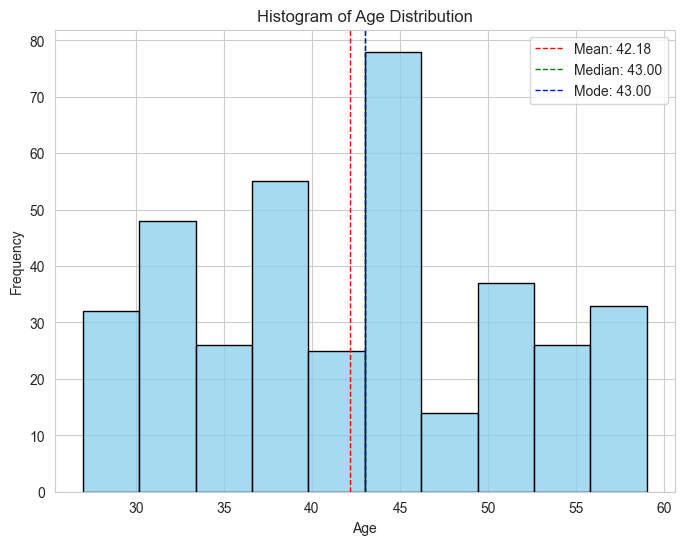

In [81]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

sns.histplot(data=data, x='Age',  kde=False, color='skyblue', edgecolor='black')

mean_value = data['Age'].mean()
median_value = data['Age'].median()
mode_value = data['Age'].mode()[0]

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mode: {mode_value:.2f}')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution')

plt.legend()

print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Mode: {mode_value:.2f}")

Mean: 7.13
Median: 7.20
Mode: 7.20


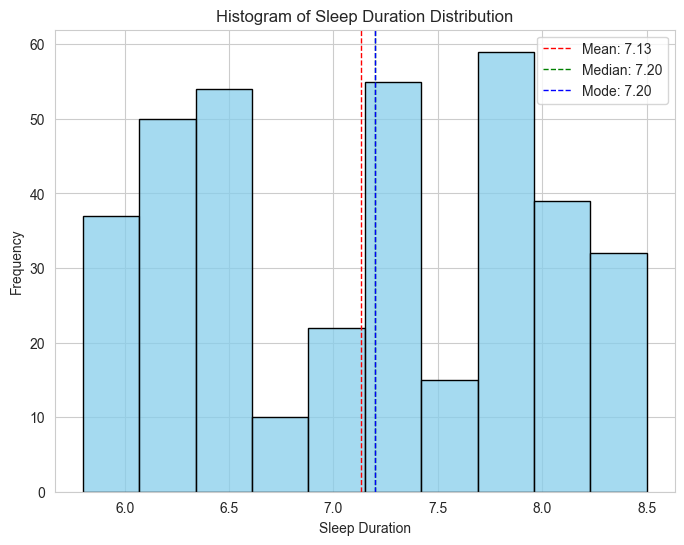

In [82]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

sns.histplot(data=data, x='Sleep Duration',  kde=False, color='skyblue', edgecolor='black')

mean_value = data['Sleep Duration'].mean()
median_value = data['Sleep Duration'].median()
mode_value = data['Sleep Duration'].mode()[0]

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mode: {mode_value:.2f}')


plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Sleep Duration Distribution')

plt.legend()

print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Mode: {mode_value:.2f}")

Mean: 7.51
Median: 7.00
Mode: 8.00


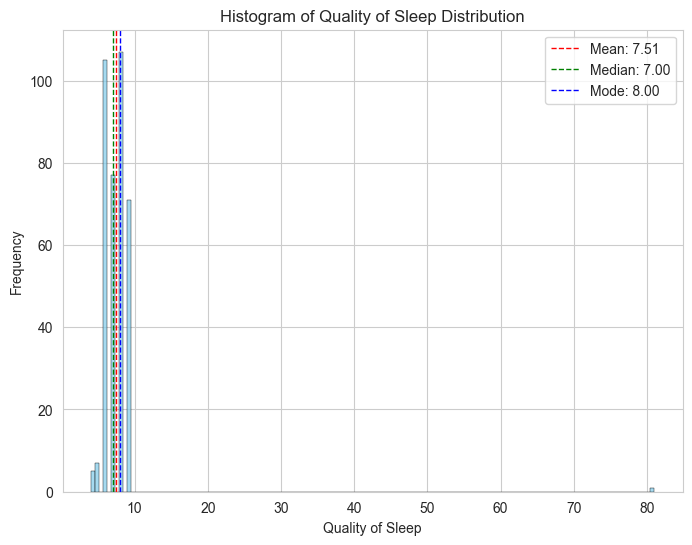

In [83]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

sns.histplot(data=data, x='Quality of Sleep',  kde=False, color='skyblue', edgecolor='black')

mean_value = data['Quality of Sleep'].mean()
median_value = data['Quality of Sleep'].median()
mode_value = data['Quality of Sleep'].mode()[0]

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mode: {mode_value:.2f}')

plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.title('Histogram of Quality of Sleep Distribution')

plt.legend()

print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Mode: {mode_value:.2f}")

Mean: 59.08
Median: 60.00
Mode: 60.00


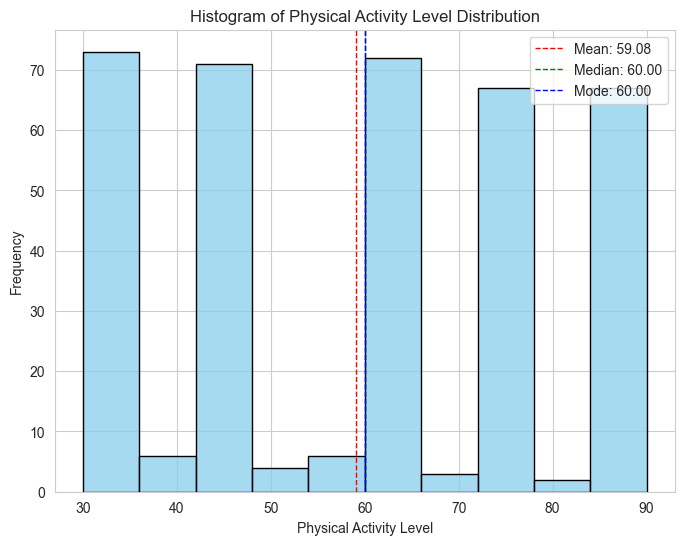

In [84]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

sns.histplot(data=data, x='Physical Activity Level',  kde=False, color='skyblue', edgecolor='black')

mean_value = data['Physical Activity Level'].mean()
median_value = data['Physical Activity Level'].median()
mode_value = data['Physical Activity Level'].mode()[0]

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mode: {mode_value:.2f}')

plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.title('Histogram of Physical Activity Level Distribution')
plt.legend()

print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Mode: {mode_value:.2f}")

Mean: 5.39
Median: 5.00
Mode: 3.00


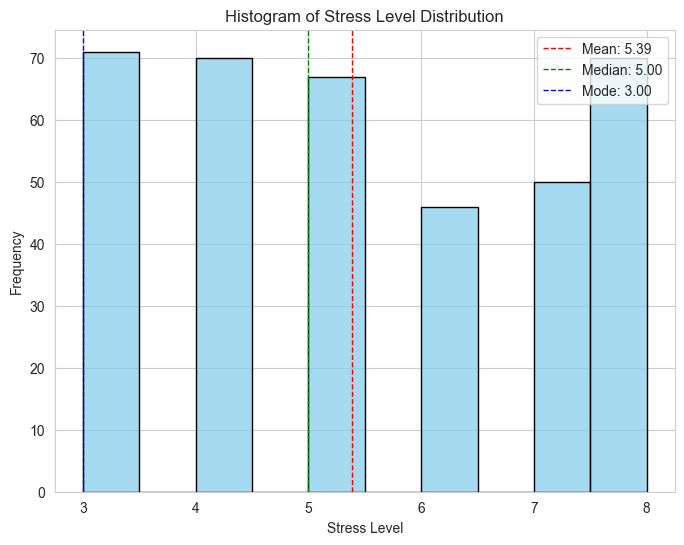

In [85]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

sns.histplot(data=data, x='Stress Level',  kde=False, color='skyblue', edgecolor='black')

mean_value = data['Stress Level'].mean()
median_value = data['Stress Level'].median()
mode_value = data['Stress Level'].mode()[0]

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mode: {mode_value:.2f}')

plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.title('Histogram of Stress Level Distribution')

plt.legend()

print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Mode: {mode_value:.2f}")

Mean: 70.17
Median: 70.00
Mode: 68.00


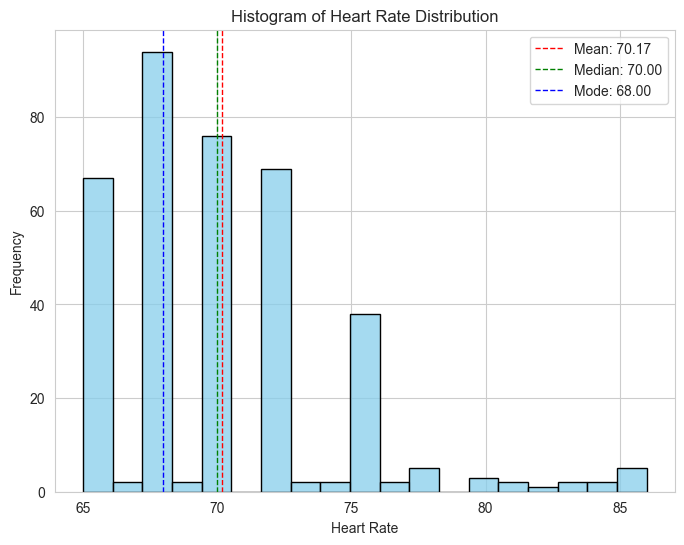

In [86]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

sns.histplot(data=data, x='Heart Rate',  kde=False, color='skyblue', edgecolor='black')

mean_value = data['Heart Rate'].mean()
median_value = data['Heart Rate'].median()
mode_value = data['Heart Rate'].mode()[0]

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mode: {mode_value:.2f}')

plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Heart Rate Distribution')

plt.legend()

print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Mode: {mode_value:.2f}")

Mean: 70.17
Median: 70.00
Mode: 68.00


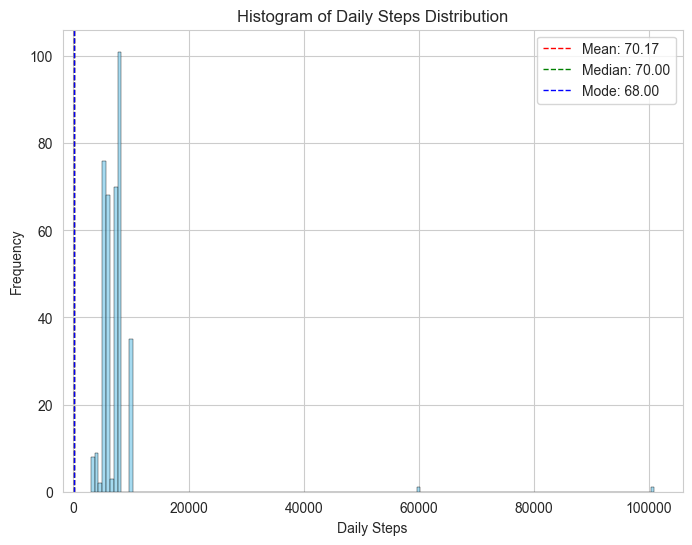

In [87]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

sns.histplot(data=data, x='Daily Steps',  kde=False, color='skyblue', edgecolor='black')

mean_value = data['Heart Rate'].mean()
median_value = data['Heart Rate'].median()
mode_value = data['Heart Rate'].mode()[0]

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mode: {mode_value:.2f}')

plt.xlabel('Daily Steps')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Steps Distribution')

plt.legend()

print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Mode: {mode_value:.2f}")

Text(0.5, 1.0, 'Boxplot of Daily Steps')

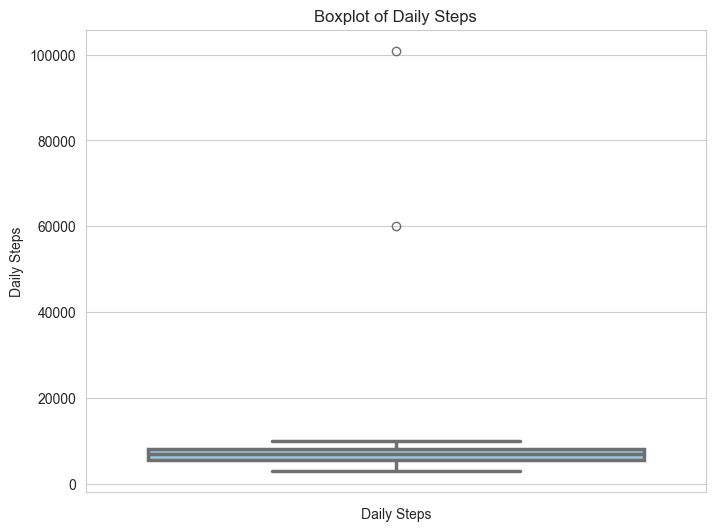

In [88]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['Daily Steps'], color='skyblue', linewidth=2.5)
plt.xlabel('Daily Steps')
plt.title('Boxplot of Daily Steps')

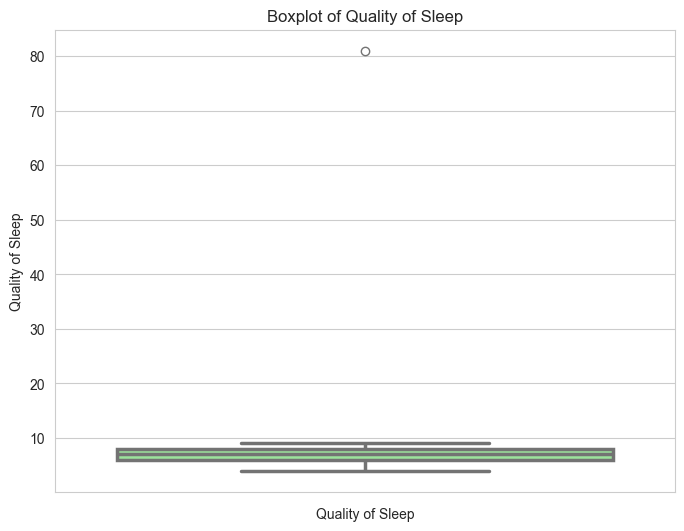

In [89]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['Quality of Sleep'], color='lightgreen', linewidth=2.5)
plt.xlabel('Quality of Sleep')
plt.title('Boxplot of Quality of Sleep')
plt.show()

In [90]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [91]:
data['Gender'].value_counts().sort_values(ascending=False)

Gender
Male      188
Female    185
Name: count, dtype: int64

In [92]:
data['Occupation'].value_counts().sort_values(ascending=False)

Occupation
Doctor                  71
Nurse                   71
Engineer                63
Lawyer                  45
Teacher                 40
Accountant              35
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Acountant                2
Layer                    1
Manager                  1
Nurce                    1
Murse                    1
Name: count, dtype: int64

In [93]:
data['BMI Category'].value_counts().sort_values(ascending=False)

BMI Category
Normal           195
Overweight       147
Normal Weight     19
Obese             10
Normal Weiht       1
NormalWeight       1
Over weight        1
Name: count, dtype: int64

In [94]:
data['Blood Pressure'].value_counts().sort_values(ascending=False)

Blood Pressure
130/85     98
125/80     65
140/95     65
120/80     44
115/75     31
135/90     27
140/90      4
125/82      4
128/85      3
132/87      3
117/76      2
126/83      2
139/91      2
118/75      2
131/86      2
128/84      2
130/86      2
119/77      2
129/84      2
135/88      2
115/78      2
142/92      2
118/76      1
220/80      1
121/79      1
115/05      1
122/80      1
130/850     1
Name: count, dtype: int64

In [95]:
data['Sleep Disorder'].value_counts().sort_values(ascending=False)

Sleep Disorder
Insomnia       77
Sleep Apnea    76
Name: count, dtype: int64

<Axes: xlabel='Occupation', ylabel='count'>

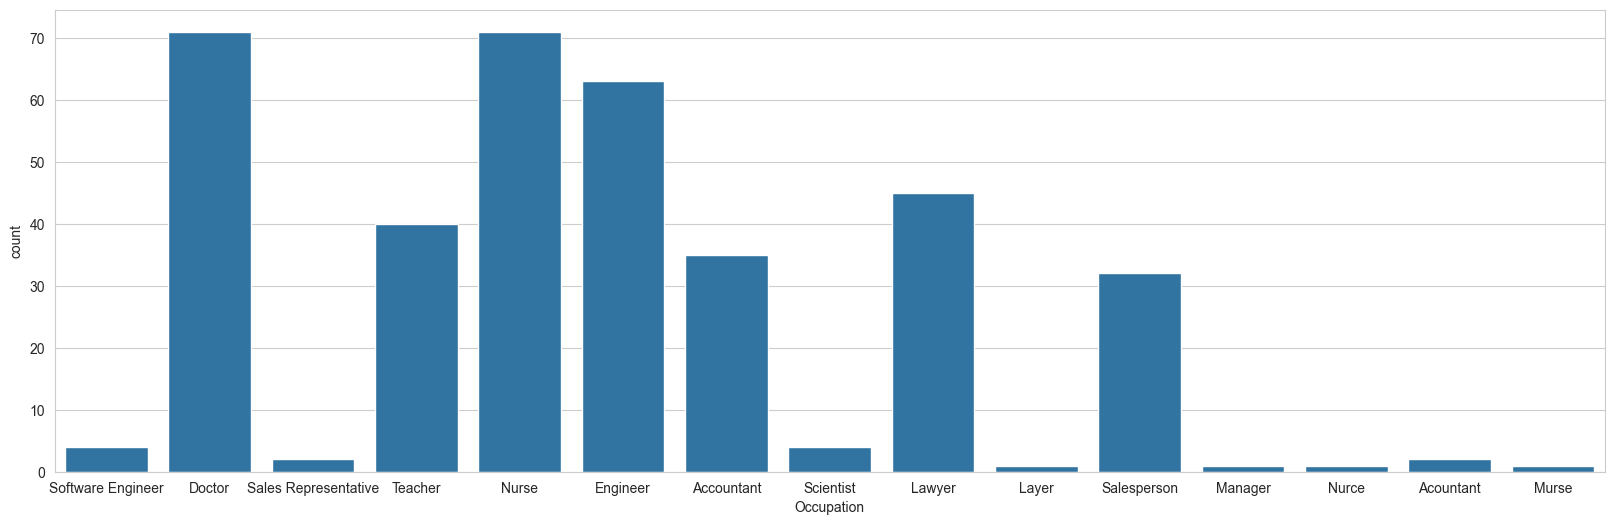

In [96]:
plt.figure(figsize=(20,6))
sns.countplot(x='Occupation', data = data)

<Axes: xlabel='Blood Pressure', ylabel='count'>

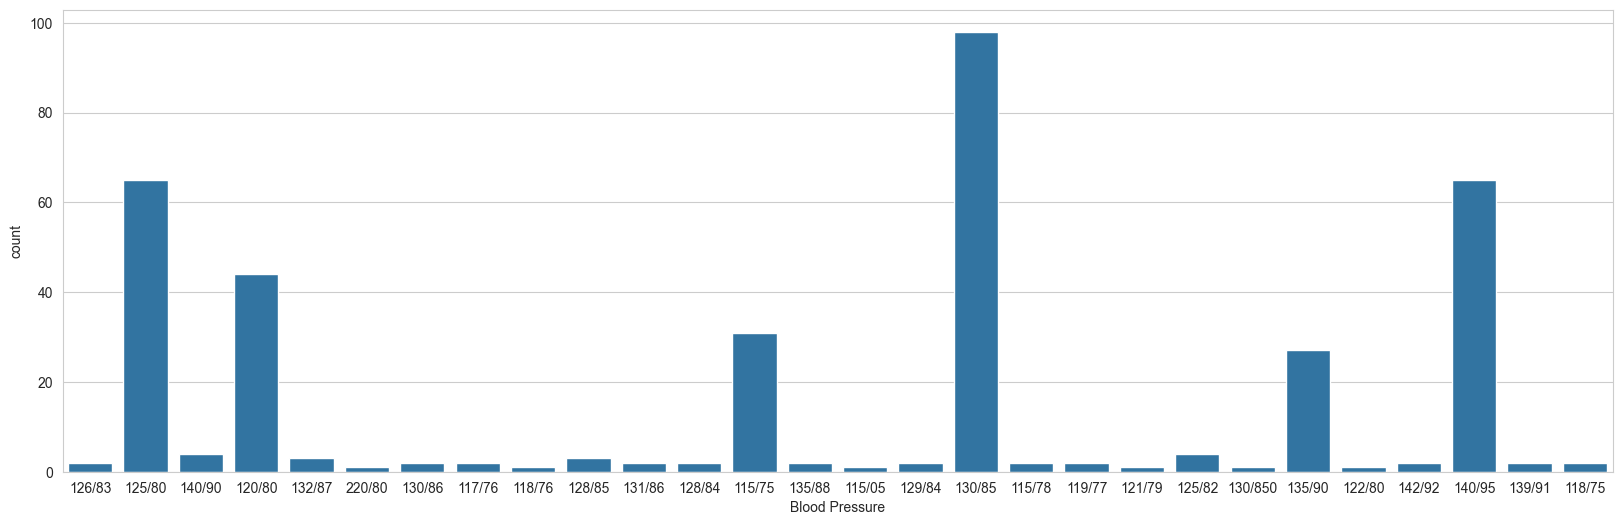

In [97]:
plt.figure(figsize=(20,6))
sns.countplot(x='Blood Pressure', data = data)

<Axes: xlabel='Gender', ylabel='count'>

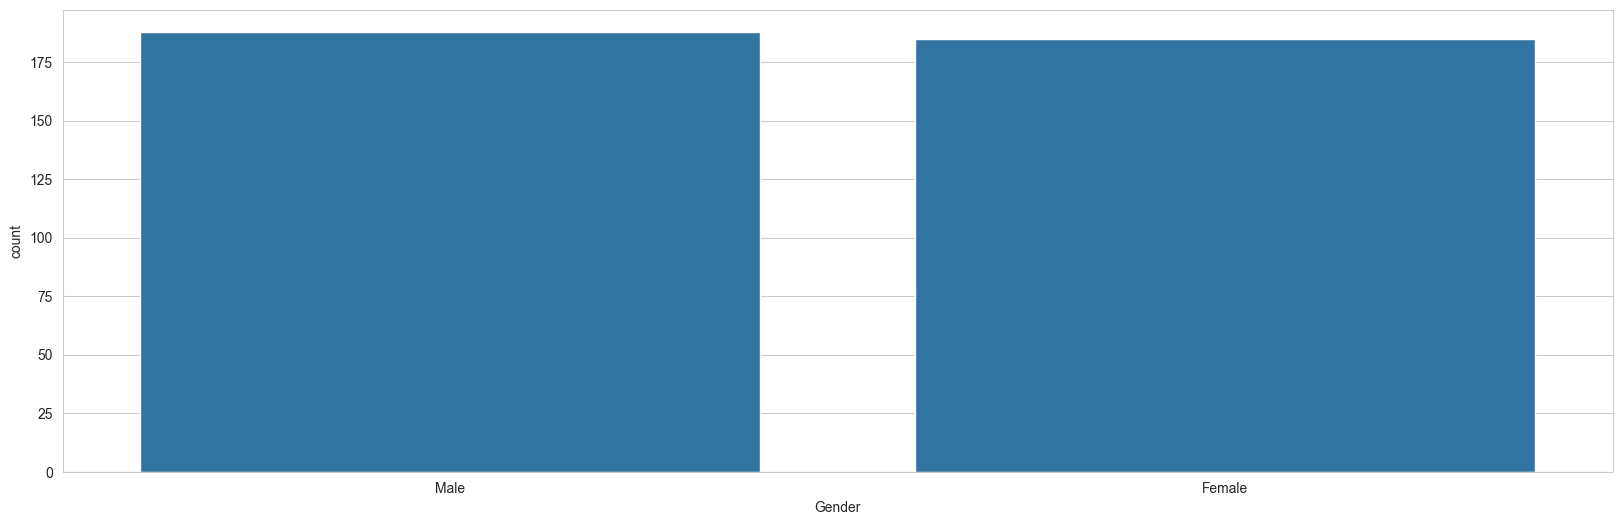

In [98]:
plt.figure(figsize=(20,6))
sns.countplot(x='Gender', data = data)

<Axes: xlabel='BMI Category', ylabel='count'>

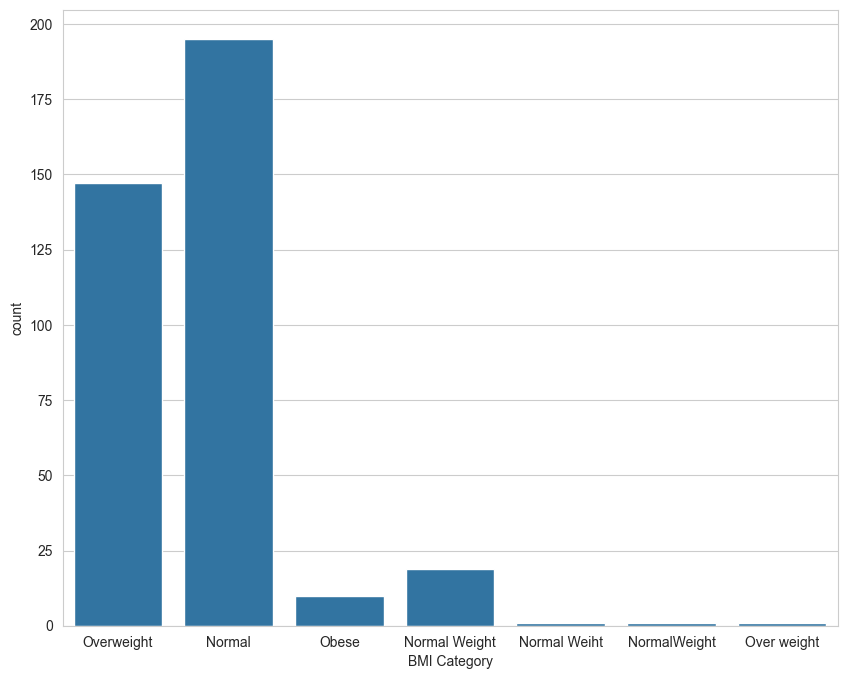

In [99]:
plt.figure(figsize=(10, 8))
sns.countplot(x='BMI Category',data=data)

<Axes: xlabel='Sleep Disorder', ylabel='count'>

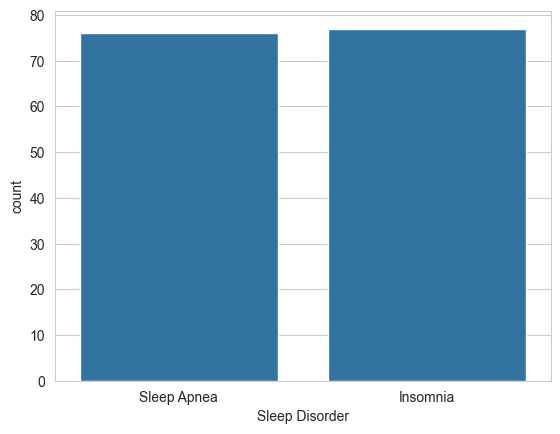

In [100]:
sns.countplot(x='Sleep Disorder', data=data)

Now, looking at blood pressure as Blood Pressure Max and Blood Pressure Min

In [2]:
data = pd.read_csv("sleep_v2.csv", sep=';', na_values='None')

In [3]:
data.columns

Index(['Blood Pressure Max', 'Blood Pressure Min', 'Person ID', 'Gender',
       'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [4]:
data.head()

,Blood Pressure Max,Blood Pressure Min,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,126.0,83.0,1,Male,27,Software Engineer,6.1,6.0,42.0,6,Overweight,77,4200,NaN
1,125.0,80.0,2,Male,28,Doctor,6.2,6.0,60.0,8,Normal,75,10000,NaN
2,125.0,80.0,3,Male,28,Doctor,6.2,6.0,60.0,8,Normal,75,10000,NaN
3,140.0,90.0,4,Male,28,Sales Representative,5.9,4.0,30.0,8,Obese,85,3000,Sleep Apnea
4,140.0,90.0,5,Male,28,Sales Representative,5.9,4.0,30.0,8,Obese,85,3000,Sleep Apnea


In [5]:
data.iloc[data['Blood Pressure Max'].idxmax()]

Blood Pressure Max          220.0
Blood Pressure Min           80.0
Person ID                      26
Gender                       Male
Age                            30
Occupation                 Doctor
Sleep Duration                7.9
Quality of Sleep              7.0
Physical Activity Level      75.0
Stress Level                    6
BMI Category               Normal
Heart Rate                     70
Daily Steps                  8000
Sleep Disorder                NaN
Name: 25, dtype: object

In [9]:
data.iloc[data['Blood Pressure Max'].idxmin()]

Blood Pressure Max              115.0
Blood Pressure Min               75.0
Person ID                          86
Gender                         Female
Age                                35
Occupation                 Accountant
Sleep Duration                    7.2
Quality of Sleep                  8.0
Physical Activity Level          60.0
Stress Level                        4
BMI Category                   Normal
Heart Rate                         68
Daily Steps                      7000
Sleep Disorder                    NaN
Name: 85, dtype: object

In [10]:
data.iloc[data['Blood Pressure Min'].idxmax()]

Blood Pressure Max          130.0
Blood Pressure Min          850.0
Person ID                     172
Gender                       Male
Age                            41
Occupation                 Lawyer
Sleep Duration                7.7
Quality of Sleep              8.0
Physical Activity Level      90.0
Stress Level                    5
BMI Category               Normal
Heart Rate                     70
Daily Steps                  8000
Sleep Disorder                NaN
Name: 171, dtype: object

In [6]:
data.iloc[data['Blood Pressure Min'].idxmin()]

Blood Pressure Max           115.0
Blood Pressure Min             5.0
Person ID                      103
Gender                      Female
Age                             36
Occupation                 Teacher
Sleep Duration                 7.2
Quality of Sleep               8.0
Physical Activity Level       60.0
Stress Level                     4
BMI Category                Normal
Heart Rate                      68
Daily Steps                   7000
Sleep Disorder                 NaN
Name: 102, dtype: object

Mean: 128.82
Median: 130.00
Mode: 130.00


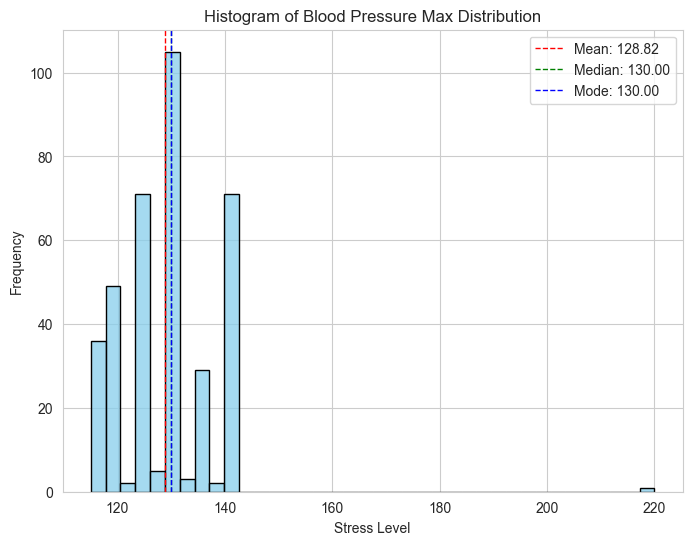

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

sns.histplot(data=data, x='Blood Pressure Max',  kde=False, color='skyblue', edgecolor='black')

mean_value = data['Blood Pressure Max'].mean()
median_value = data['Blood Pressure Max'].median()
mode_value = data['Blood Pressure Max'].mode()[0]

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mode: {mode_value:.2f}')

plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.title('Histogram of Blood Pressure Max Distribution')

plt.legend()

print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Mode: {mode_value:.2f}")

Mean: 86.51
Median: 85.00
Mode: 80.00


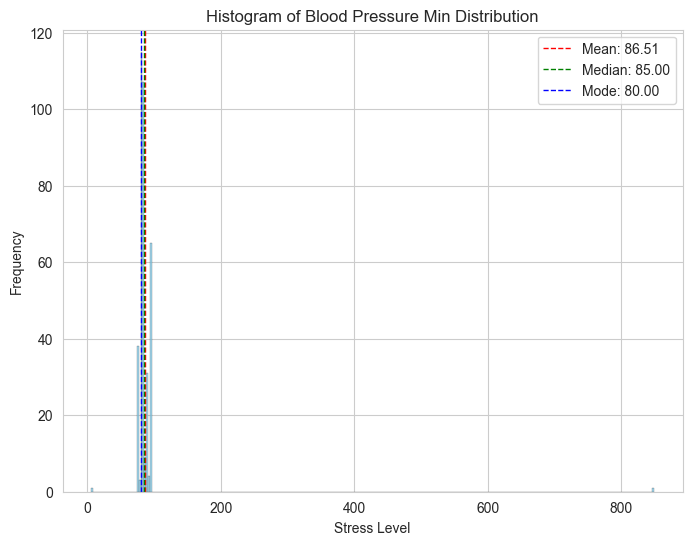

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

sns.histplot(data=data, x='Blood Pressure Min',  kde=False, color='skyblue', edgecolor='black')

mean_value = data['Blood Pressure Min'].mean()
median_value = data['Blood Pressure Min'].median()
mode_value = data['Blood Pressure Min'].mode()[0]

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mode: {mode_value:.2f}')

plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.title('Histogram of Blood Pressure Min Distribution')

plt.legend()

print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Mode: {mode_value:.2f}")

# Training models

In [ ]:
data = pd.read_csv('sleep_limpio_v3.csv')

## Data preparation

In [104]:
data = data[['Blood Pressure Max', 'Blood Pressure Min','Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder']]

In [105]:
labelencoder = preprocessing.LabelEncoder()
data['Gender'] = labelencoder.fit_transform(data['Gender'])
data['Occupation'] = labelencoder.fit_transform(data['Occupation'])
data['BMI Category'] = labelencoder.fit_transform(data['BMI Category'])
data.head()

,Blood Pressure Max,Blood Pressure Min,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,126.0,83.0,1,27,2,6.1,6,42,6,2,77,4200,0
1,125.0,80.0,1,28,1,6.2,6,60,8,0,75,10000,0
2,125.0,80.0,1,28,1,6.2,6,60,8,0,75,10000,0
3,140.0,90.0,1,28,6,5.9,4,30,8,1,85,3000,1
4,140.0,90.0,1,28,6,5.9,4,30,8,1,85,3000,1


In [106]:
# Separate the characteristics (X) and the target variable (y).
x = data[['Blood Pressure Max', 'Blood Pressure Min','Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps']]
y = data[['Sleep Disorder']]
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [107]:
x.head(1)

,Blood Pressure Max,Blood Pressure Min,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps
0,126.0,83.0,1,27,2,6.1,6,42,6,2,77,4200


In [108]:
# Scale the features to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

## Logistic Regression

In [109]:
model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\lucia\Desktop\Desktop\Ciencia de Datos\pyen\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lucia\Desktop\Desktop\Ciencia de Datos\pyen\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## K Nearest Neighbors

In [110]:
# K Nearest Neighbors model with Grid Search
knn = KNeighborsClassifier()
# Define the range of k values
k_values = list(range(1, 30))

# Create a pipeline for KNN with scaling
pipe = Pipeline(steps=[("knn", knn)])

# Define parameters grid for GridSearchCV
param_grid = {"knn__n_neighbors": k_values}

# Perform Grid Search Cross-Validation
cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy")
cv_classifier.fit(scaled_x_train, y_train.values.ravel())

# Print the best parameters
print(cv_classifier.best_params_)

{'knn__n_neighbors': 7}


## Metrics

In [111]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", class_report)

Accuracy: 0.9466666666666667
Precision: 0.9375
Recall: 0.9375
F1 Score: 0.9375
Confusion Matrix:
 [[41  2]
 [ 2 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.94      0.94      0.94        32

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



In [112]:
y_pred = cv_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", class_report)

Accuracy: 0.4266666666666667
Precision: 0.4266666666666667
Recall: 1.0
F1 Score: 0.5981308411214953
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.43      1.00      0.60        32

    accuracy                           0.43        75
   macro avg       0.21      0.50      0.30        75
weighted avg       0.18      0.43      0.26        75



c:\Users\lucia\Desktop\Desktop\Ciencia de Datos\pyen\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\lucia\Desktop\Desktop\Ciencia de Datos\pyen\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucia\Desktop\Desktop\Ciencia de Datos\pyen\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucia\Desktop\Desktop\Ciencia de Datos\pyen\Lib\site-packages\sklearn\metrics\_classification.

## Testing a new patient



In [113]:
v = np.array([126.0, 83.0, 1, 27, 2, 6.1, 6, 42, 6, 2, 77, 4200]).reshape(1, -1)
scaled_data = scaler.fit_transform(v)

In [114]:
prediction = model.predict(scaled_data)
print("Prediction:", prediction)

Prediction: [0]


c:\Users\lucia\Desktop\Desktop\Ciencia de Datos\pyen\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [115]:
joblib.dump(model, "Model.pkl")

['Model.pkl']